In [1]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np
import statsmodels.formula.api as smf
from pandas.plotting import scatter_matrix
from mpl_toolkits import mplot3d #for 3d analysis
import statistics
from functools import reduce
from sklearn import linear_model
from scipy.stats import norm

In [2]:
pip install cryptocmd

Note: you may need to restart the kernel to use updated packages.


In [3]:

from cryptocmd import CmcScraper

#1. BTC
scraper = CmcScraper("BTC")
headers, data = scraper.get_data()
btc_price = scraper.get_dataframe()

#2. ETH
scraper2 = CmcScraper("ETH")
headers, data = scraper2.get_data()
eth_price = scraper2.get_dataframe()

#3. BNB
scraper3 = CmcScraper("BNB")
headers, data = scraper3.get_data()
bnb_price = scraper3.get_dataframe()

#4. USDT
scraper4 = CmcScraper("USDT")
headers, data = scraper4.get_data()
usdt_price = scraper4.get_dataframe()

#5. ADA
scraper5 = CmcScraper("ADA")
headers, data = scraper5.get_data()
ada_price = scraper5.get_dataframe()

#6. SOL
scraper6 = CmcScraper("SOL")
headers, data = scraper6.get_data()
sol_price = scraper6.get_dataframe()

#7. XRP
scraper7 = CmcScraper("XRP")
headers, data = scraper7.get_data()
xrp_price = scraper7.get_dataframe()

#8. DOT
scraper8 = CmcScraper("DOT")
headers, data = scraper8.get_data()
dot_price = scraper8.get_dataframe()

#9. SHIB
scraper9 = CmcScraper("SHIB")
headers, data = scraper9.get_data()
shib_price = scraper9.get_dataframe()

#10. DOGE
scraper10 = CmcScraper("DOGE")
headers, data = scraper10.get_data()
doge_price = scraper10.get_dataframe()

### Portfolio

In [4]:
#1. MATIC
coin1 = CmcScraper("MATIC")
headers, data = coin1.get_data()
matic = coin1.get_dataframe()

#2. SAND
coin2 = CmcScraper("SAND")
headers, data = coin2.get_data()
sand = coin2.get_dataframe()

#3. JOE
coin3 = CmcScraper("JOE")
headers, data = coin3.get_data()
joe = coin3.get_dataframe()

#4. AVAX
coin4 = CmcScraper("AVAX")
headers, data = coin4.get_data()
avax = coin4.get_dataframe()

#5. KAR
coin5 = CmcScraper("KAR")
headers, data = coin5.get_data()
kar = coin5.get_dataframe()

#6. MOVR
coin6 = CmcScraper("MOVR")
movr = coin6.get_dataframe()

#7. YGG
coin7 = CmcScraper("YGG")
ygg = coin7.get_dataframe()


In [5]:
btc_price.columns =[btc_price.columns[0]]+['btc_'+i for i in btc_price.columns[1:]]
eth_price.columns =[eth_price.columns[0]]+['eth_'+i for i in eth_price.columns[1:]]
bnb_price.columns =[bnb_price.columns[0]]+['bnb_'+i for i in bnb_price.columns[1:]]
usdt_price.columns =[usdt_price.columns[0]]+['usdt_'+i for i in usdt_price.columns[1:]]
ada_price.columns =[ada_price.columns[0]]+['ada_'+i for i in ada_price.columns[1:]]
sol_price.columns =[sol_price.columns[0]]+['sol_'+i for i in sol_price.columns[1:]]
xrp_price.columns =[xrp_price.columns[0]]+['xrp_'+i for i in xrp_price.columns[1:]]
dot_price.columns =[dot_price.columns[0]]+['dot_'+i for i in dot_price.columns[1:]]
shib_price.columns =[shib_price.columns[0]]+['shib_'+i for i in shib_price.columns[1:]]
doge_price.columns =[doge_price.columns[0]]+['doge_'+i for i in doge_price.columns[1:]]

In [6]:
matic.columns =[matic.columns[0]]+['matic_'+i for i in matic.columns[1:]]
sand.columns =[sand.columns[0]]+['sand_'+i for i in sand.columns[1:]]
joe.columns =[joe.columns[0]]+['joe_'+i for i in joe.columns[1:]]
avax.columns =[avax.columns[0]]+['avax_'+i for i in avax.columns[1:]]
kar.columns =[kar.columns[0]]+['kar_'+i for i in kar.columns[1:]]
movr.columns =[movr.columns[0]]+['movr_'+i for i in movr.columns[1:]]
ygg.columns =[ygg.columns[0]]+['ygg_'+i for i in ygg.columns[1:]]

In [7]:
df = [btc_price,eth_price,bnb_price,usdt_price,ada_price,sol_price,xrp_price,dot_price,shib_price,doge_price,matic,sand,joe,avax,movr,kar,ygg]




In [8]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='outer'), df)
df_merged = df_merged[df_merged['Date']>='2021-09-01']

In [9]:
for coins in ['btc_', 'eth_','bnb_','usdt_','ada_','xrp_','sol_','dot_','shib_','doge_','matic_','sand_','joe_','avax_','kar_','movr_','ygg_']: 
    kwargs = { coins+'returns': lambda x: (x[coins+'Close']-x[coins+'Open'])/x[coins+'Open']}
    df_merged = df_merged.assign(**kwargs)
df_merged.fillna(0)

,Date,btc_Open,btc_High,btc_Low,btc_Close,btc_Volume,btc_Market Cap,eth_Open,eth_High,eth_Low,...,dot_returns,shib_returns,doge_returns,matic_returns,sand_returns,joe_returns,avax_returns,kar_returns,movr_returns,ygg_returns
0,2021-11-07,61554.921805,63326.989028,61432.489114,63326.989028,2.472675e+10,1.194779e+12,4523.982161,4640.922037,4510.984411,...,0.003884,-0.031136,0.016581,-0.001056,-0.008425,0.037089,0.112929,0.044648,0.027088,0.010470
1,2021-11-06,61068.873447,61590.682429,60163.781549,61527.481793,2.909493e+10,1.160769e+12,4482.647973,4530.996953,4334.973587,...,0.002761,-0.065459,0.002428,-0.007717,0.056255,-0.011121,0.059068,-0.032234,-0.041269,0.001422
2,2021-11-05,61460.079040,62541.467686,60844.607608,61125.674269,3.060510e+10,1.153129e+12,4537.423370,4570.895951,4447.487296,...,-0.036807,0.263256,-0.008304,-0.009025,-0.046731,-0.091280,-0.059241,-0.011984,-0.111446,-0.054657
3,2021-11-04,62941.804035,63123.288915,60799.662475,61452.230587,3.261585e+10,1.159231e+12,4604.678632,4606.516313,4426.622763,...,0.010238,-0.103958,-0.021669,-0.058243,-0.159731,0.055796,0.049163,-0.065011,0.106700,0.063248
4,2021-11-03,63254.334881,63516.937584,61184.240178,62970.047426,3.612473e+10,1.187808e+12,4589.684616,4664.910076,4462.976107,...,0.035089,-0.202480,-0.014982,0.049541,0.058137,0.232695,0.112985,-0.007880,0.098788,-0.055970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,2021-09-05,49937.858015,51868.681630,49538.598381,51753.411926,3.032268e+10,9.733549e+11,3886.330957,3979.186586,3838.487399,...,0.062537,0.014765,0.050791,-0.035060,-0.017453,-0.030016,0.020639,-0.006432,0.011940,-0.037992
64,2021-09-04,50009.325096,50545.581012,49548.780451,49944.626906,3.747133e+10,9.392861e+11,3937.910226,3969.448739,3837.931054,...,-0.034503,0.053748,0.011213,0.189810,-0.007884,0.045911,0.027081,0.011425,-0.041689,0.011641
65,2021-09-03,49288.249112,50982.271573,48386.086163,50025.374605,4.320618e+10,9.407572e+11,3787.486534,4022.469360,3712.678248,...,0.058914,-0.001412,0.005156,0.008785,-0.002359,-0.092067,-0.036506,-0.033753,-0.124957,-0.034454
66,2021-09-02,48807.848862,50343.420705,48652.319791,49327.723184,3.950807e+10,9.275909e+11,3825.027724,3830.711365,3726.750474,...,-0.041364,-0.016667,0.005309,-0.015469,-0.002966,0.349031,0.124238,-0.031881,0.201685,0.015138


In [10]:
df_close = df_merged[['btc_Close','eth_Close','bnb_Close','usdt_Close','ada_Close','sol_Close','xrp_Close','dot_Close','shib_Close','doge_Close','kar_Close','movr_Close']]
df_close.fillna(0)


,btc_Close,eth_Close,bnb_Close,usdt_Close,ada_Close,sol_Close,xrp_Close,dot_Close,shib_Close,doge_Close,kar_Close,movr_Close
0,63326.989028,4620.554503,650.454065,1.001517,2.021872,249.823483,1.217534,52.277980,0.000057,0.266315,7.575387,386.192623
1,61527.481793,4521.581083,636.113951,1.001454,2.006609,258.934312,1.152454,52.009216,0.000059,0.261898,7.247207,376.511539
2,61125.674269,4486.243405,608.648048,1.001553,1.986206,236.474334,1.161533,51.894674,0.000062,0.261465,7.492773,393.128351
3,61452.230587,4537.324081,559.737291,1.000857,1.984882,247.387778,1.202003,53.881732,0.000049,0.263280,7.583863,442.771628
4,62970.047426,4607.193607,568.578792,1.000678,2.063701,242.898815,1.208796,53.443703,0.000055,0.269407,8.111084,400.872201
...,...,...,...,...,...,...,...,...,...,...,...,...
63,51753.411926,3952.133497,504.619861,1.000261,2.910824,142.070877,1.305498,34.408789,0.000008,0.314527,7.570289,139.337158
64,49944.626906,3887.828490,498.078419,1.000384,2.832807,139.113062,1.255779,32.417514,0.000007,0.299388,7.641722,137.407483
65,50025.374605,3940.614737,488.604714,1.000220,2.968239,146.583052,1.291435,33.674276,0.000007,0.296273,7.554594,142.979058
66,49327.723184,3790.990088,483.921048,1.000281,2.963438,128.102392,1.256324,31.814712,0.000007,0.295955,7.821162,166.569535


# Correlation analysis

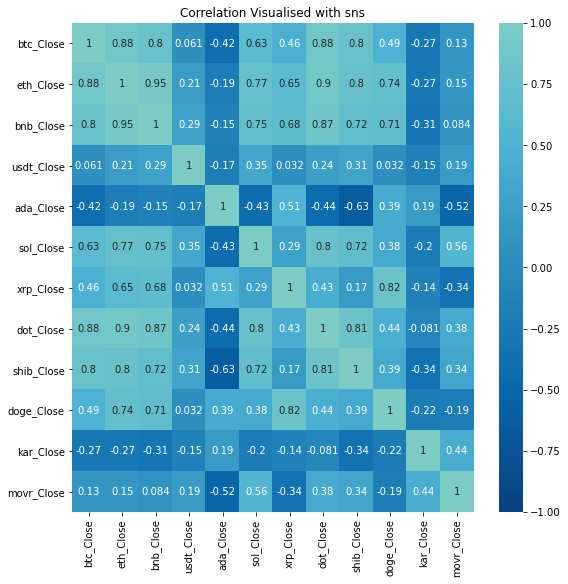

In [11]:
df_close.corr()
correlation = df_close.corr()

plt.figure(figsize=(9,9))
plt.title('Correlation Visualised with sns')
sns.heatmap(correlation,annot=True,vmin=-1,vmax=1,cmap="GnBu_r",center=1) 

# Laspeyres Market index

In [12]:
df_marketcap = df_merged[['btc_Market Cap','eth_Market Cap','bnb_Market Cap','usdt_Market Cap','ada_Market Cap','sol_Market Cap','xrp_Market Cap','dot_Market Cap','shib_Market Cap','doge_Market Cap']]
df_marketcap
df_merged["combined marketcap"] = df_marketcap.sum(axis=1)



In [13]:
df_merged['index'] = (df_merged['btc_Close'] * df_merged['btc_Market Cap'] + df_merged['eth_Close'] * df_merged['eth_Market Cap'] + df_merged['bnb_Close'] * df_merged['bnb_Market Cap'] + df_merged['usdt_Close'] * df_merged['usdt_Market Cap'] + df_merged['ada_Close'] * df_merged['ada_Market Cap'] + df_merged['sol_Close'] * df_merged['sol_Market Cap'] + df_merged['xrp_Close'] * df_merged['xrp_Market Cap'] + df_merged['dot_Close'] * df_merged['dot_Market Cap'] + df_merged['shib_Close'] * df_merged['shib_Market Cap'] + df_merged['doge_Close'] * df_merged['doge_Market Cap'])/ df_merged['combined marketcap']
df_merged['index open'] = (df_merged['btc_Open'] * df_merged['btc_Market Cap'] + df_merged['eth_Open'] * df_merged['eth_Market Cap'] + df_merged['bnb_Open'] * df_merged['bnb_Market Cap'] + df_merged['usdt_Open'] * df_merged['usdt_Market Cap'] + df_merged['ada_Open'] * df_merged['ada_Market Cap'] + df_merged['sol_Open'] * df_merged['sol_Market Cap'] + df_merged['xrp_Open'] * df_merged['xrp_Market Cap'] + df_merged['dot_Open'] * df_merged['dot_Market Cap'] + df_merged['shib_Open'] * df_merged['shib_Market Cap'] + df_merged['doge_Open'] * df_merged['doge_Market Cap'])/ df_merged['combined marketcap']
df_merged['index returns'] = (df_merged['index'] - df_merged['index open'])/ df_merged['index open']
df_merged.fillna(0)


,Date,btc_Open,btc_High,btc_Low,btc_Close,btc_Volume,btc_Market Cap,eth_Open,eth_High,eth_Low,...,sand_returns,joe_returns,avax_returns,kar_returns,movr_returns,ygg_returns,combined marketcap,index,index open,index returns
0,2021-11-07,61554.921805,63326.989028,61432.489114,63326.989028,2.472675e+10,1.194779e+12,4523.982161,4640.922037,4510.984411,...,-0.008425,0.037089,0.112929,0.044648,0.027088,0.010470,2.240523e+12,34937.716412,33968.896766,0.028521
1,2021-11-06,61068.873447,61590.682429,60163.781549,61527.481793,2.909493e+10,1.160769e+12,4482.647973,4530.996953,4334.973587,...,0.056255,-0.011121,0.059068,-0.032234,-0.041269,0.001422,2.190581e+12,33747.744542,33493.078529,0.007604
2,2021-11-05,61460.079040,62541.467686,60844.607608,61125.674269,3.060510e+10,1.153129e+12,4537.423370,4570.895951,4447.487296,...,-0.046731,-0.091280,-0.059241,-0.011984,-0.111446,-0.054657,2.168966e+12,33632.037983,33820.435688,-0.005571
3,2021-11-04,62941.804035,63123.288915,60799.662475,61452.230587,3.261585e+10,1.159231e+12,4604.678632,4606.516313,4426.622763,...,-0.159731,0.055796,0.049163,-0.065011,0.106700,0.063248,2.172594e+12,33943.211456,34754.853795,-0.023353
4,2021-11-03,63254.334881,63516.937584,61184.240178,62970.047426,3.612473e+10,1.187808e+12,4589.684616,4664.910076,4462.976107,...,0.058137,0.232695,0.112985,-0.007880,0.098788,-0.055970,2.215618e+12,34924.791580,35071.528386,-0.004184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,2021-09-05,49937.858015,51868.681630,49538.598381,51753.411926,3.032268e+10,9.733549e+11,3886.330957,3979.186586,3838.487399,...,-0.017453,-0.030016,0.020639,-0.006432,0.011940,-0.037992,1.862560e+12,28057.361505,27091.752412,0.035642
64,2021-09-04,50009.325096,50545.581012,49548.780451,49944.626906,3.747133e+10,9.392861e+11,3937.910226,3969.448739,3837.931054,...,-0.007884,0.045911,0.027081,0.011425,-0.041689,0.011641,1.810101e+12,26924.168978,26970.113549,-0.001704
65,2021-09-03,49288.249112,50982.271573,48386.086163,50025.374605,4.320618e+10,9.407572e+11,3787.486534,4022.469360,3712.678248,...,-0.002359,-0.092067,-0.036506,-0.033753,-0.124957,-0.034454,1.824675e+12,26817.028289,26397.488312,0.015893
66,2021-09-02,48807.848862,50343.420705,48652.319791,49327.723184,3.950807e+10,9.275909e+11,3825.027724,3830.711365,3726.750474,...,-0.002966,0.349031,0.124238,-0.031881,0.201685,0.015138,1.783278e+12,26629.737655,26367.738479,0.009936


# Developing portfolio

In [14]:
pfl = df_merged[['Date','kar_returns','movr_returns','eth_returns','avax_returns','sol_returns','dot_returns','ygg_returns']]
pfl.fillna(0)

,Date,kar_returns,movr_returns,eth_returns,avax_returns,sol_returns,dot_returns,ygg_returns
0,2021-11-07,0.044648,0.027088,0.021347,0.112929,-0.034616,0.003884,0.010470
1,2021-11-06,-0.032234,-0.041269,0.008685,0.059068,0.094893,0.002761,0.001422
2,2021-11-05,-0.011984,-0.111446,-0.011280,-0.059241,-0.043663,-0.036807,-0.054657
3,2021-11-04,-0.065011,0.106700,-0.014627,0.049163,0.017647,0.010238,0.063248
4,2021-11-03,-0.007880,0.098788,0.003815,0.112985,0.098708,0.035089,-0.055970
...,...,...,...,...,...,...,...,...
63,2021-09-05,-0.006432,0.011940,0.016932,0.020639,0.022165,0.062537,-0.037992
64,2021-09-04,0.011425,-0.041689,-0.012718,0.027081,-0.049894,-0.034503,0.011641
65,2021-09-03,-0.033753,-0.124957,0.040430,-0.036506,0.141710,0.058914,-0.034454
66,2021-09-02,-0.031881,0.201685,-0.008899,0.124238,0.156877,-0.041364,0.015138


# Finding Beta

### Returns Linearity

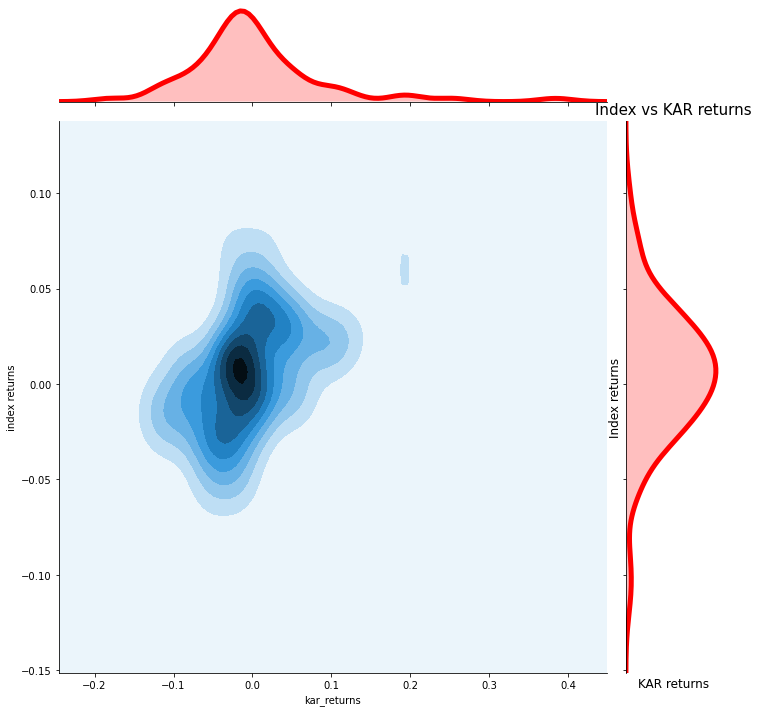

In [15]:
sns.jointplot(x=df_merged['kar_returns'], 
              y=df_merged['index returns'],
              height=10,
              kind="kde",
              marginal_kws={'lw':5,
                                'color':'red'})
plt.ylabel("Index returns", fontsize=12)
plt.xlabel("KAR returns", fontsize=12)
plt.title("Index vs KAR returns", fontsize=15)
plt.show()

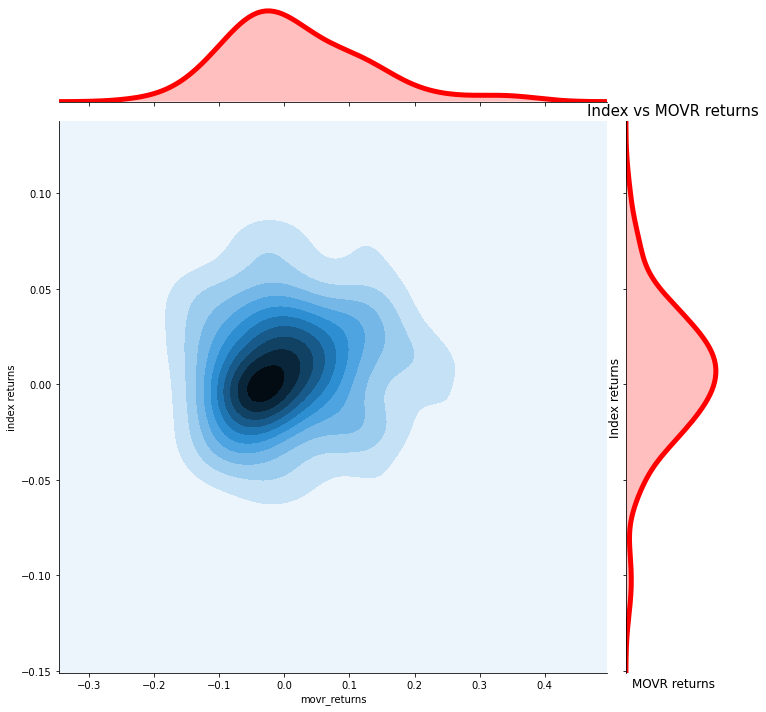

In [16]:
sns.jointplot(x=df_merged['movr_returns'], 
              y=df_merged['index returns'],
              height=10,
              kind="kde",
              marginal_kws={'lw':5,
                                'color':'red'})
plt.ylabel("Index returns", fontsize=12)
plt.xlabel("MOVR returns", fontsize=12)
plt.title("Index vs MOVR returns", fontsize=15)
plt.show()

### Returns normality

In [17]:
import scipy.stats as stats
import pylab as pl

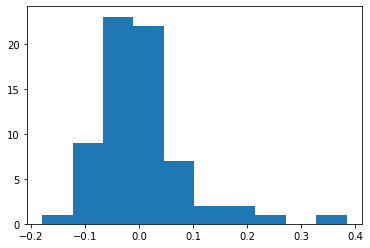

In [18]:
m = pfl['kar_returns']

pl.hist(m) 

pl.show()

### MLR

In [21]:
X = df_merged[['kar_returns','movr_returns','eth_returns','avax_returns','sol_returns','dot_returns','ygg_returns']]
y = df_merged['index returns']

regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


Intercept: 
 0.001970525389859734
Coefficients: 
 [ 0.03135811 -0.00261015  0.56456665 -0.04066756 -0.0202568   0.06752579
  0.04285441]


### Variance

In [23]:
from statistics import variance

In [24]:
print("KAR variance: ")
df_merged.var()['kar_Close']


KAR variance: 


1.5243754560393854

In [25]:
print("MOVR variance: ")
df_merged.var()['movr_Close']

MOVR variance: 


6607.15876870336

In [26]:
print("ETH variance: ")
df_merged.var()['eth_Close']

ETH variance: 


242747.5672232518

In [27]:
print("avax variance: ")
df_merged.var()['avax_Close']

avax variance: 


99.63276895655636

In [28]:
print("SOL variance: ")
df_merged.var()['sol_Close']

SOL variance: 


1024.5515403862964

In [29]:
print("DOT variance: ")
df_merged.var()['dot_Close']

DOT variance: 


54.50761328691117

In [30]:
print("YGG variance: ")
df_merged.var()['ygg_Close']

YGG variance: 


0.8856649506388959

# VaR

In [31]:
# 37.5% movr 37.5% kar 0.15 eth
weights = np.array([0.338,0.3298,0.1103,0.1065,0.1153,0.117,0.094])

capital = 2501

In [32]:
cov_matrix = pfl.cov()
cov_matrix

,kar_returns,movr_returns,eth_returns,avax_returns,sol_returns,dot_returns,ygg_returns
kar_returns,0.007602,0.003377,0.001892,0.003063,0.000961,0.004066,0.002994
movr_returns,0.003377,0.011318,0.000293,0.003560,0.002324,0.001978,0.001093
eth_returns,0.001892,0.000293,0.002105,0.001540,0.001453,0.002258,0.002149
avax_returns,0.003063,0.003560,0.001540,0.005852,0.001491,0.002648,0.002898
sol_returns,0.000961,0.002324,0.001453,0.001491,0.004643,0.001664,0.001091
dot_returns,0.004066,0.001978,0.002258,0.002648,0.001664,0.004708,0.002696
ygg_returns,0.002994,0.001093,0.002149,0.002898,0.001091,0.002696,0.008295


In [33]:
ind_mean = pfl.mean()
ind_mean

kar_returns     0.003141
movr_returns    0.018148
eth_returns     0.005687
avax_returns    0.014397
sol_returns     0.012857
dot_returns     0.009821
ygg_returns     0.002112
dtype: float64

In [34]:
# Calculate portfolio standard deviation
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
 
# Calculate mean of investment
mean_investment = (1+ind_mean) * capital
             
# Calculate standard deviation of investmnet
stdev_investment = capital * port_stdev

In [35]:
pfl_mean = ind_mean.dot(weights)
pfl_stddev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
mean_investment = (1+pfl_mean) * capital
stdev_investment = capital * pfl_stddev

In [36]:
conf_level = 0.05

inv = norm.ppf(conf_level, mean_investment, stdev_investment)
var_1 = capital - inv
percentage_var = var_1 *100 / capital
print('Portfolio will not lose more than:') 
print('$', var_1, 'or', percentage_var, '%' ' today') 

Portfolio will not lose more than:
$ 267.26216816175247 or 10.68621224157347 % today


1 day VaR @ 95% confidence: 267.26
2 day VaR @ 95% confidence: 377.97
3 day VaR @ 95% confidence: 462.91
4 day VaR @ 95% confidence: 534.52
5 day VaR @ 95% confidence: 597.62
6 day VaR @ 95% confidence: 654.66
7 day VaR @ 95% confidence: 707.11
8 day VaR @ 95% confidence: 755.93
9 day VaR @ 95% confidence: 801.79
10 day VaR @ 95% confidence: 845.16
11 day VaR @ 95% confidence: 886.41
12 day VaR @ 95% confidence: 925.82
13 day VaR @ 95% confidence: 963.63
14 day VaR @ 95% confidence: 1000.0
15 day VaR @ 95% confidence: 1035.1
16 day VaR @ 95% confidence: 1069.05
17 day VaR @ 95% confidence: 1101.95
18 day VaR @ 95% confidence: 1133.9
19 day VaR @ 95% confidence: 1164.97
20 day VaR @ 95% confidence: 1195.23
21 day VaR @ 95% confidence: 1224.75
22 day VaR @ 95% confidence: 1253.57
23 day VaR @ 95% confidence: 1281.74
24 day VaR @ 95% confidence: 1309.31
25 day VaR @ 95% confidence: 1336.31
26 day VaR @ 95% confidence: 1362.78
27 day VaR @ 95% confidence: 1388.73
28 day VaR @ 95% confidenc

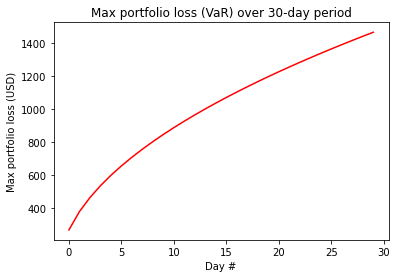

In [37]:
var_array = []
num_days = int(30)
for x in range(1, num_days+1):    
    var_array.append(np.round(var_1 * np.sqrt(x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1 * np.sqrt(x),2)))

# Build plot
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over 30-day period")
plt.plot(var_array, "r")

# ARIMA

Daily ARIMA of Crypto market

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

In [ ]:
index = df_merged['index']

#### testing for stationary

if p < 0.05, reject null and indeed stationary

In [ ]:
result = adfuller(index.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

Crypto market is not stationary

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(index); axes[0, 0].set_title('Original Series')
plot_acf(index, lags = 50)

# 1st Differencing
axes[1, 0].plot(index.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(index.diff().dropna(), lags = 50)

# 2nd Differencing
axes[2, 0].plot(index.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(index.diff().diff().dropna(), lags = 50)

plt.show()

1st differentiating weak stationarity

In [ ]:
pip install pmdarima

In [ ]:
from pmdarima.arima.utils import ndiffs

y = index

## Adf Test
ndiffs(y, test='adf')  # 2

# KPSS test
ndiffs(y, test='kpss')  # 0

# PP test:
ndiffs(y, test='pp')  # 2

In [ ]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(index.diff()); axes[0].set_title('1st Differencing')

axes[1].set(ylim=(0,5))
plot_pacf(index.diff().dropna(), lags = 50)


plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(index, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [ ]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf

train = index[:85]
test = index[85:]

In [ ]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(0, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# Build Model
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(0, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Fear and Greed index

In [ ]:
pip install requests

In [ ]:
import requests

In [ ]:
import json 

r = requests.get('https://api.alternative.me/fng/?limit=0')
json = r.json()


In [ ]:
json.keys()

In [ ]:
fng = pd.DataFrame(json['data'])
fng_value = fng[['timestamp','value']]
fng_value

In [ ]:
from datetime import datetime
timestamp = fng['timestamp']
#unix_conversion = datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S')
#print(datetime.utcfromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S'))
fng['Date'] = pd.to_datetime(fng['timestamp'],unit='s')
fng

In [ ]:
fng_reg = [df_merged,fng]

df_reg = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='outer'), fng_reg)
df_reg = df_merged[df_merged['Date']>='2021-03-01']
df_reg

In [ ]:
x = df_reg['Date']
y1 = df_reg['value']

y2 = df_reg['index']

 
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'y-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Fear & Greed', color='r')
ax2.set_ylabel('Crypto Index', color='b')

plt.show()

# 3D observations

In [ ]:
three_d = plt.axes(projection='3d')

sol_returns = df_reg['index returns']
avax_returns = df_reg['index']
val = df_reg['value']

# Data for three-dimensional scattered points
zdata = index
xdata = val
ydata = sol_returns
three_d.scatter3D(xdata, ydata, zdata, c=zdata, cmap='CMRmap_r');

In [ ]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(xdata, ydata, zdata, cmap='viridis', edgecolor='none');